In [59]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.feature_selection import f_classif



In [60]:
import pandas as pd

columns = (
'CaseID_inSharedFolder','SubstituteIDs_forMRN','TAPS_CaseIDs_PreNAT','TumorSegmented','Sex','Age','BMI','PerformStat_ECOG','DM','PerformStat_WHO','Preop_AST_ALT_ratio','Preop_Total_Bili','Preop_Platelet','Preop_AST','Preop_ALT',
'Preop_INR',	
'Preop_Weight_loss',	
'Preop_Creatinine',	
'CA19-9_Baseline',
'CA19.9 postNAC',
'CA19-9_Preop',
'CA19-9_Nadir',
'PreNAC_Bil_Obstrct',
'PreNAC_Bil_Drainage',
'Baseline_Resectablty',
'Resected',
'Resection_Type',
'Art_Invlmnt',
'Vein_Invlmnt',
'Venous_Resec',
'Venous_Resec_Type',
'Art_Resec',
'Art_Resec_Type',
'Resect_Margin',
'R1_Status',
'Path_Diff',
'Tumor_Loc',
'Tumor_Size_PreNAC',
'Tumor_Size_PostNAC',
'Tumor_Size_PostNAT',
'RECIST_PostNAT',
'Eval_PostNAT',
'T_Stage',
'N_Stage',
'Tum_Clinic_Stage',
'numberLN_Examined',
'numberLN_Involved',
'Pos_LNs_Ratio',
'LVI',
'PNI',
'TxEffect_Percent',
'Neoadj_Chemo',
'Neoadj_Chemo-Rigem_Name',
'Neoadj_Chemo-Rigem_Coded',
'Neoadj_Chemo_CycleNo',
'Chemo_RTx',	
'Chemo_RTx_RegName',	
'RTx_postNAC',	
'Nadj_RadTx',	
'Nadj_RadTx_Type',	
'Nadj_RadTx_FracNo',	
'Nadj_RadTx_TotalGy',	
'Adj_Chemo',	
'Adj_Chemo_Regim	',
'Adj_Chemo_Cycle',	
'PostOp_Holiday',	
'OS_fromDx',	
'OS_fromSurg',
'RFS_fromDx',
'RFS_fromSurg',
'Recrnc-Prgrss_Loc')

data = pd.read_excel('PDAC-Response_forExtCollab_Updated-2024-06-04.xlsx', 'Dataset_forAnalysis_ExtCollab', header=None,names = columns)
data

,CaseID_inSharedFolder,SubstituteIDs_forMRN,TAPS_CaseIDs_PreNAT,TumorSegmented,Sex,Age,BMI,PerformStat_ECOG,DM,PerformStat_WHO,...,Nadj_RadTx_TotalGy,Adj_Chemo,Adj_Chemo_Regim\t,Adj_Chemo_Cycle,PostOp_Holiday,OS_fromDx,OS_fromSurg,RFS_fromDx,RFS_fromSurg,Recrnc-Prgrss_Loc
0,1,2,3,4,5,6,7,8,9,10,...,62,63,64,65,66,67,68,69,70,71
1,CaseID_inSharedFolder,SubstituteIDs_forMRN,TAPS_CaseIDs_PreNAT,TumorSegmented,Sex,Age,BMI,PerformStat_ECOG,DM,PerformStat_WHO,...,Nadj_RadTx_TotalGy,Adj_Chemo,Adj_Chemo_Regim,Adj_Chemo_Cycle,PostOp_Holiday,OS_fromDx,OS_fromSurg,RFS_fromDx,RFS_fromSurg,Recrnc-Prgrss_Loc
2,546226,100001,CASE594,1,1,68.054795,32.158934,0,NaN,NaN,...,3500,-999,-999,-999,-999,13.233333,-999,9.766667,-999,liver+peritoneum+local POD
3,546227,100002,CASE616,1,1,70.449315,31.885916,1,NaN,NaN,...,7500,-999,-999,-999,-999,48.633333,-999,12.5,-999,NaN
4,546228,100003,CASE539,0,0,60.30411,22.3,1,NaN,NaN,...,3600,0,-111,-111,-111,18.166667,16.966667,7.533333,1.933333,liver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,546222,100093,CASE622,1,0,70.827397,38.477509,1,NaN,NaN,...,-111,-999,-999,-999,-999,11.8,-999,9.833333,-999,local POD (switch Tx)
95,546223,100094,CASE632,1,0,66.624658,22.503472,1,NaN,NaN,...,6750,-999,-999,-999,-999,14.3,-999,7.6,-999,NaN
96,546224,100095,CASE624,1,0,54.2,28.367524,1,NaN,NaN,...,-111,0,-111,-111,-111,21.666667,16.466667,6.733333,1.533333,peritoneal
97,100096,100096,CASE629,-999,0,68.443836,22.970569,1,NaN,NaN,...,-111,-999,-999,-999,-999,2.833333,-999,2.833333,-999,NaN


In [61]:
#View which ones do not exist in the post-treatment folder

import os 
justPostCaseIDs = pd.Series(data['CaseID_inSharedFolder']).to_list()[2:]
print('=======Cases from the xsxl file==============')
print(justPostCaseIDs)
print(f'# of ids in xsxl:{len(justPostCaseIDs)}')

print('--- IDs with unmatched NACT CTs ---')
for case in justPostCaseIDs:
    if '546' not in str(case):
        print(case)

postFolder = 'PDAC-Response/PDAC-Response/ImagingData/Post-treatment'
folders = []
print('Folders that have \'no segmentation\' in the name in the post-treatment folder: ')
for folder in os.listdir(postFolder):
    if 'no segmentation' in folder:
        # continue
        folder = folder.replace('no segmentation', '')
        print(folder)
    folders.append(int(folder)) 


print('After further checking, 546228, 546141, 546142 are correct; the other ones are marked with 1 for \'tumor segmented\' but currently do not have the segmentation\n')

printData = data[['CaseID_inSharedFolder', 'TumorSegmented']]
print(printData.loc[printData['CaseID_inSharedFolder'] == 546141])

print(printData.loc[printData['CaseID_inSharedFolder'] == 546142])

print(printData.loc[printData['CaseID_inSharedFolder'] == 546165])

print(printData.loc[printData['CaseID_inSharedFolder'] == 546175])

print(printData.loc[printData['CaseID_inSharedFolder'] == 546180])

print(printData.loc[printData['CaseID_inSharedFolder'] == 546228])

print('=================================================================\n\n')
print(f'# of folders in post-treatment folder: {len(folders)}')
print('=======Cases in the post-treatment folder that are not in the csv==============')
successes=0
for folder in folders:
    if folder in justPostCaseIDs:
        successes+=1 
    else:   
        print(folder)
print(f'# of folders that are in both xsxl and the post-treatment folder: {successes} (92 should be correct)')

=======Cases from the xsxl file==============
[546226, 546227, 546228, 546229, 546230, 546231, 546232, 546233, 546234, 546140, 546141, 546142, 546143, 546144, 546145, 546146, 546147, 546148, 546149, 546150, 546151, 546152, 546153, 546154, 100025, 546156, 546157, 546158, 546159, 546160, 546161, 546162, 546163, 100034, 546165, 546166, 546167, 546168, 546169, 546170, 546171, 546172, 546173, 546174, 546175, 546176, 546177, 546178, 546179, 546180, 546181, 546182, 546183, 546184, 546185, 546186, 546187, 546188, 546189, 546190, 546191, 546192, 546193, 546194, 100065, 546196, 546197, 546198, 546199, 546200, 546201, 546202, 546203, 546204, 546205, 546206, 546207, 546208, 546209, 546210, 100081, 546211, 546212, 546213, 546214, 546215, 546216, 546217, 546218, 546219, 546220, 546221, 546222, 546223, 546224, 100096, 546225]
# of ids in xsxl:97
--- IDs with unmatched NACT CTs ---
100025
100034
100065
100081
100096
Folders that have 'no segmentation' in the name in the post-treatment folder: 
546141 

## Data Normalization

In [62]:

# Reset
data = pd.read_excel('PDAC-Response_forExtCollab_Updated-2024-06-04.xlsx', 'Dataset_forAnalysis_ExtCollab', header=None,names = columns)

# Assume that the N/A in LVI and PNI are actually -999 for no surgery []Could it just be not checked?[]

data['LVI'].replace('N/A', -999, inplace=True)
data['PNI'].replace('N/A', -999, inplace=True)

# Drop the rows with non-existing pre segmentations, CASE481
data.drop(data[data['TAPS_CaseIDs_PreNAT'] == 'CASE481'].index, inplace = True)

# Drop undefined recist criteria cases
data.drop(data[data['RECIST_PostNAT'] == -999].index, inplace = True)

#Add in a new column, slice thickness
data.insert(len(data.columns), 'Slice_Thickness', 0)
singleDigitSliceNumber = 0
file = open('pre-treatment_num_of_slices.txt', 'r')
for line in file:
    if 'CASE' not in line:
        break
    line = line.strip().split()
    case = line[0]
    slices = int(line[1])
    if slices > 16:
        singleDigitSliceNumber+=1
    data.loc[data['TAPS_CaseIDs_PreNAT'] == case, 'Slice_Thickness'] = slices

# data.loc[1, 'Slice_Thickness'] = 'Slice_Thickness'
# data.loc[0, 'Slice_Thickness'] = 72

# Drop the header rows
data.drop([0,1], inplace=True)

#Remove Corrupted cases, CASE533 and CASE629
data.drop(data[data['TAPS_CaseIDs_PreNAT'] == 'CASE533'].index, inplace = True)
data.drop(data[data['TAPS_CaseIDs_PreNAT'] == 'CASE629'].index, inplace = True)

print('# of single digit slice count patients',singleDigitSliceNumber)

# Drop patients with 0 slice thickness:
data.drop(data[data['Slice_Thickness'] == 0].index, inplace = True)

# Remove indicies if they have less than 7 slices

#Drop empty columns
dropColumns = [
    'DM','PerformStat_WHO','Preop_AST_ALT_ratio','Preop_Total_Bili','Preop_Platelet','Preop_AST','Preop_ALT','Preop_INR','Preop_Weight_loss'
]
data.drop(columns=dropColumns, inplace=True)

data




# of single digit slice count patients 26


,CaseID_inSharedFolder,SubstituteIDs_forMRN,TAPS_CaseIDs_PreNAT,TumorSegmented,Sex,Age,BMI,PerformStat_ECOG,Preop_Creatinine,CA19-9_Baseline,...,Adj_Chemo,Adj_Chemo_Regim\t,Adj_Chemo_Cycle,PostOp_Holiday,OS_fromDx,OS_fromSurg,RFS_fromDx,RFS_fromSurg,Recrnc-Prgrss_Loc,Slice_Thickness
2,546226,100001,CASE594,1,1,68.054795,32.158934,0,0.8,4481,...,-999,-999,-999,-999,13.233333,-999,9.766667,-999,liver+peritoneum+local POD,20
3,546227,100002,CASE616,1,1,70.449315,31.885916,1,1.4,38,...,-999,-999,-999,-999,48.633333,-999,12.5,-999,NaN,10
4,546228,100003,CASE539,0,0,60.30411,22.3,1,1.2,18,...,0,-111,-111,-111,18.166667,16.966667,7.533333,1.933333,liver,18
5,546229,100004,CASE505,1,0,75.767123,24.6,1,1,5,...,1,3,-999,66,18.366667,17.433333,15.166667,8.566667,NaN,9
6,546230,100005,CASE264,1,0,53.320548,24,1,0.8,95,...,0,-111,-111,-111,31.7,9.8,23.8,1.9,liver,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,546221,100092,CASE623,1,1,66.887671,33.950617,1,0.8,1,...,-999,-999,-999,-999,22.4,-999,8.1,-999,peritoneal+gastric nodule,8
94,546222,100093,CASE622,1,0,70.827397,38.477509,1,0.9,5522,...,-999,-999,-999,-999,11.8,-999,9.833333,-999,local POD (switch Tx),15
95,546223,100094,CASE632,1,0,66.624658,22.503472,1,0.8,1,...,-999,-999,-999,-999,14.3,-999,7.6,-999,NaN,13
96,546224,100095,CASE624,1,0,54.2,28.367524,1,0.9,90,...,0,-111,-111,-111,21.666667,16.466667,6.733333,1.533333,peritoneal,13


## Using f_classif to calculate F-value from ANOVA table

In [63]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif

# TO DO (I guess not since we no longer do clinical data)

In [64]:
# # Turn the string labels into numerical values for correlation
# from sklearn.preprocessing import LabelEncoder

# correlationData = data.drop(columns=['CaseID_inSharedFolder', 'SubstituteIDs_forMRN', 'TAPS_CaseIDs_PreNAT', 'Slice_Thickness'])

# # paramsToEncode = ['T_Stage','N_Stage','Tum_Clinic_Stage', 'Neoadj_Chemo-Rigem_Name', 'Recrnc-Prgrss_Loc']

# labelConversions = {}
# for param in correlationData.columns:
#     correlationData[param] = correlationData[param].astype(str)
#     le = LabelEncoder()
#     data[param] = le.fit_transform(correlationData[param])
#     correlationData[param] = le.transform(correlationData[param])
    

# # for key, value in labelConversions.items():
# #     print(f'{key}: {value}')
# # print(labelConversions)

# correlationData


In [65]:
# # Make the heatmap of the correlations between the known columns

# fig = plt.figure(figsize=(50, 50), dpi=100)

# correlationBetweenColumns = correlationData.corr()

# ax = sns.heatmap(correlationBetweenColumns, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 16},  fmt='.2f')
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=30)

# plt.tick_params(axis='x', labelsize=20, rotation=90)
# plt.tick_params(axis='y', labelsize=20, rotation=0)
# plt.title('PDAC Response Dataset Feature Correlations', size=30, pad=30)

# plt.savefig('PDAC-Response-Correlation-Heatmap.png', dpi=100)
# plt.show()



#### See if PCA helps with the linear correlation

In [66]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# recistPostNat = correlationData[['RECIST_PostNAT']]
# features = correlationData.drop(columns=['RECIST_PostNAT'])

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(features)

# pca = PCA(n_components=5)
# principal_components = pca.fit_transform(scaled_data)
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# result_df = pd.concat([recistPostNat, pca_df], axis=1)


# # # find which ones have a correlation a correlation with RECISt_PostNAT

# correlationBetweenColumns = result_df.corr()
# print(correlationBetweenColumns)

In [67]:
# # # find which ones have a correlation a correlation with RECISt_PostNAT
# correlationBetweenColumns['RECIST_PostNAT'][abs(correlationBetweenColumns['RECIST_PostNAT']) > 0.2]

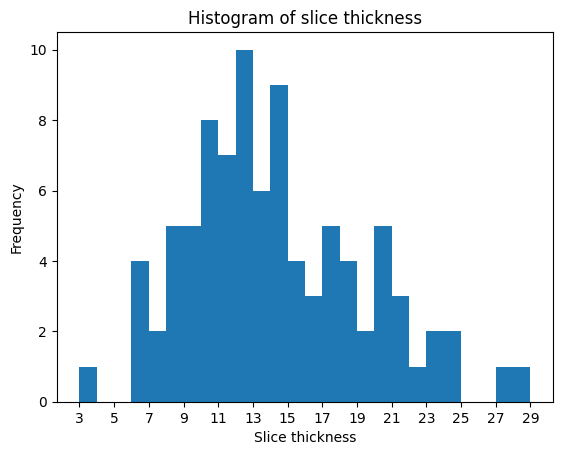

In [68]:
sliceThicknesses = data['Slice_Thickness']
plt.hist(sliceThicknesses, bins = range(min(sliceThicknesses), max(sliceThicknesses) + 1 )) #[ i for i in range(0,data['slice_thickness'][2:].max() )] )

plt.xticks(range(min(sliceThicknesses), max(sliceThicknesses) + 1,2))

plt.title('Histogram of slice thickness')
plt.xlabel('Slice thickness')
plt.ylabel('Frequency')
plt.show()



{1: 58, 2: 16, 3: 16}


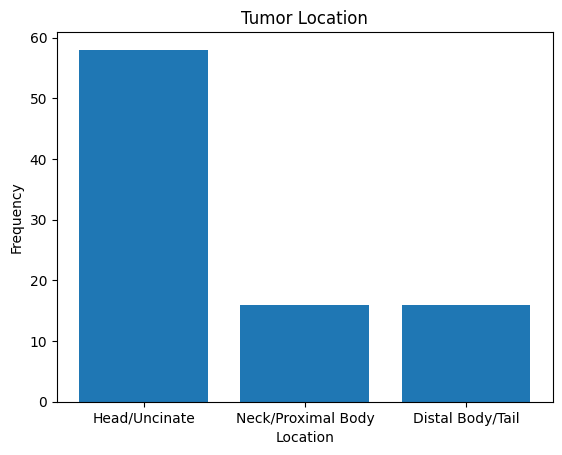

In [69]:
tumorLocation = list(data['Tumor_Loc'])
# print(tumorLocation)
tumorLocation = {x: tumorLocation.count(x) for x in tumorLocation}
print(tumorLocation)

myKeys = list(tumorLocation.keys())
myKeys.sort()
tumorLocation = {i: tumorLocation[i] for i in myKeys}
names = ['Head/Uncinate','Neck/Proximal Body','Distal Body/Tail']
tumorLocation = dict(zip(names, list(tumorLocation.values())))


plt.bar(tumorLocation.keys(), tumorLocation.values()) #[ i for i in range(0,data['slice_thickness'][2:].max() )] )
plt.title('Tumor Location')

plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

{1: 22, 2: 40, 3: 28}
Note there are no 'Complete Response' in the dataset.


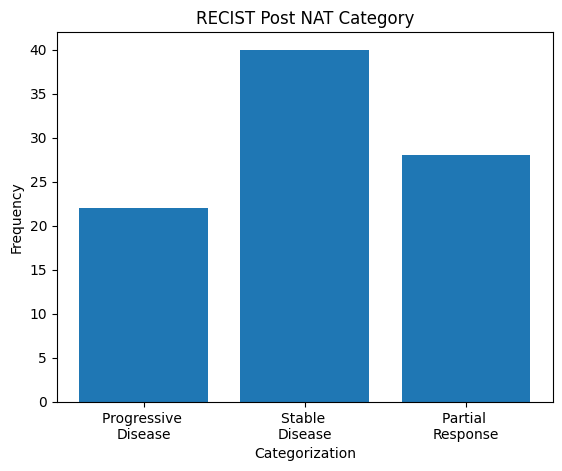

In [70]:
recistPostNat = list(data['RECIST_PostNAT'])

recistPostNat = {x: recistPostNat.count(x) for x in recistPostNat}

myKeys = list(recistPostNat.keys())
myKeys.sort()
recistPostNat = {i: recistPostNat[i] for i in myKeys}
print(recistPostNat)
names = [ 'Progressive \nDisease','Stable \nDisease','Partial \nResponse','Complete \nResponse'] 
# names = ['Not evaluated/\nNot recorded', 'Progressive \nDisease','Stable \nDisease','Partial \nResponse','Complete \nResponse'] 

recistPostNat = dict(zip(names, list(recistPostNat.values())))

# print('Note that \'Not evaluated/Not recorded\' are recorded as the same, but different in the xsxl.')
print('Note there are no \'Complete Response\' in the dataset.')
plt.bar(recistPostNat.keys(), recistPostNat.values()) 
plt.title('RECIST Post NAT Category')

plt.xlabel('Categorization')
plt.ylabel('Frequency')
plt.show()

In [71]:
#Remove the 3 'Not evaluated/Not recorded' results from the dataset (Note that -999 is converted to 0 for this column)
data.drop(data[data['RECIST_PostNAT'] == 'empty'].index, inplace = True)
data.drop(data[data['RECIST_PostNAT'] == 0].index, inplace = True)
data

,CaseID_inSharedFolder,SubstituteIDs_forMRN,TAPS_CaseIDs_PreNAT,TumorSegmented,Sex,Age,BMI,PerformStat_ECOG,Preop_Creatinine,CA19-9_Baseline,...,Adj_Chemo,Adj_Chemo_Regim\t,Adj_Chemo_Cycle,PostOp_Holiday,OS_fromDx,OS_fromSurg,RFS_fromDx,RFS_fromSurg,Recrnc-Prgrss_Loc,Slice_Thickness
2,546226,100001,CASE594,1,1,68.054795,32.158934,0,0.8,4481,...,-999,-999,-999,-999,13.233333,-999,9.766667,-999,liver+peritoneum+local POD,20
3,546227,100002,CASE616,1,1,70.449315,31.885916,1,1.4,38,...,-999,-999,-999,-999,48.633333,-999,12.5,-999,NaN,10
4,546228,100003,CASE539,0,0,60.30411,22.3,1,1.2,18,...,0,-111,-111,-111,18.166667,16.966667,7.533333,1.933333,liver,18
5,546229,100004,CASE505,1,0,75.767123,24.6,1,1,5,...,1,3,-999,66,18.366667,17.433333,15.166667,8.566667,NaN,9
6,546230,100005,CASE264,1,0,53.320548,24,1,0.8,95,...,0,-111,-111,-111,31.7,9.8,23.8,1.9,liver,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,546221,100092,CASE623,1,1,66.887671,33.950617,1,0.8,1,...,-999,-999,-999,-999,22.4,-999,8.1,-999,peritoneal+gastric nodule,8
94,546222,100093,CASE622,1,0,70.827397,38.477509,1,0.9,5522,...,-999,-999,-999,-999,11.8,-999,9.833333,-999,local POD (switch Tx),15
95,546223,100094,CASE632,1,0,66.624658,22.503472,1,0.8,1,...,-999,-999,-999,-999,14.3,-999,7.6,-999,NaN,13
96,546224,100095,CASE624,1,0,54.2,28.367524,1,0.9,90,...,0,-111,-111,-111,21.666667,16.466667,6.733333,1.533333,peritoneal,13


In [81]:
from collections import Counter
columns = ['TAPS_CaseIDs_PreNAT','RECIST_PostNAT', 'Slice_Thickness']
data.drop(data[data['Slice_Thickness'] < 6].index, inplace = True)

# # # Get the entire datasheet
cases = list(data['TAPS_CaseIDs_PreNAT'])
recistCriteria = list(data['RECIST_PostNAT'])

sliceThickness = list(data['Slice_Thickness'])
sliceThickness.sort()
print(f'Number of patients: {len(sliceThickness)}\nSlice range: {min(sliceThickness)}-{max(sliceThickness)}')


print(f'Distribution of classes previously: [1=Progressive Disease, 2=Stable Disease, 3=Partial Response, 4=Complete Response]')
counter = Counter(recistCriteria)
print(sorted(counter.items()))

# # recistNames = [ 'Progressive \nDisease','Stable \nDisease','Partial \nResponse'] 
# # names = ['Not evaluated/\nNot recorded', 'Progressive \nDisease','Stable \nDisease','Partial \nResponse','Complete \nResponse'] 

## Combine the progressive disease and stable disease
# Dataset does not have 0 or else cases
for i in range(len(recistCriteria)):
    if recistCriteria[i] == 0: # Not evaluated
        recistCriteria[i] = 0
    elif recistCriteria[i] == 1: # Progressive disease
        recistCriteria[i] = 1
    elif recistCriteria[i] == 2: # Stable disease
        recistCriteria[i] = 1
    elif recistCriteria[i] == 3: # Partial Response
        recistCriteria[i] = 2
    elif recistCriteria[i] == 4: # Complete Response
        recistCriteria[i] = 2 
    else: # Other
        recistCriteria[i] = 0    

print(f'Distribution of classes after combining progressive disease with stable disease:')
counter = Counter(recistCriteria)
print(sorted(counter.items()))

Number of patients: 89
Slice range: 6-29
Distribution of classes previously: [1=Progressive Disease, 2=Stable Disease, 3=Partial Response, 4=Complete Response]
[(1, 21), (2, 40), (3, 28)]
Distribution of classes after combining progressive disease with stable disease:
[(1, 61), (2, 28)]


In [14]:
data.to_excel('PDAC-Response_working.xlsx', columns = ['TAPS_CaseIDs_PreNAT', 'RECIST_PostNAT','Slice_Thickness'], index=False)

In [88]:
tempData = pd.DataFrame.copy(data)

# droppedValues = []

# #Drop where there is no pretreatment tumor size
# tempData.drop(tempData[tempData['Tumor_Size_PreNAC'] == -999].index, inplace = True)
# #Drop where there is no post treatment tumor size
# tempData.drop(tempData[tempData['Tumor_Size_PreNAC'] == -999 and tempData['Tumor_Size_PostNAT'] == -999].index, inplace = True)

len(tempData)
preNAC = list(data['Tumor_Size_PreNAC'])
postNAC = list(data['Tumor_Size_PostNAC'])
postNAT = list(data['Tumor_Size_PostNAT'])

relativeChanges = []
assert len(preNAC) == len(postNAC) == len(postNAT)


for i in range(len(preNAC)):
    if postNAT[i]==-999:
        relativeChanges.append( (preNAC[i] - postNAC[i] ) / (postNAC[i] + preNAC[i]) )

    else:
        
        relativeChanges.append( (preNAC[i] - postNAT[i]) / (postNAT[i] + preNAC[i]) )

countPos=0
countNeg=0
countNoDiff=0
for result in relativeChanges:
    if result>0:
        countPos+=1
    elif result<0:
        countNeg+=1
    else:
        countNoDiff+=1
print(relativeChanges)    
print('# of Cases that show Tumor Shank',countPos)
print('# of Cases that show Tumor Grew',countNeg)
print('# of no change',countNoDiff)


[-0.051546391752577324, 0.3125, 0.0, -0.050000000000000044, 0.3559322033898305, 0.3, 0.26829268292682934, 0.39682539682539686, 0.054545454545454515, -0.0, 0.15662650602409636, 0.25581395348837205, 0.03030303030303029, -0.19444444444444445, -0.06493506493506489, -0.07246376811594203, 0.04950495049504951, 0.13513513513513511, -0.09756097560975609, 0.20547945205479456, 0.09803921568627452, -0.06976744186046507, 0.03703703703703707, 0.15555555555555559, 0.4193548387096775, 1.005420054200542, 0.1481481481481482, 0.25, 0.3714285714285714, -0.11999999999999993, 0.0, 0.0571428571428572, 0.09090909090909091, -0.014492753623188418, 0.0285714285714286, 0.11538461538461542, 0.07692307692307693, -0.17391304347826095, 0.20720720720720717, -0.18918918918918923, 0.2566371681415929, 0.1714285714285714, 0.062499999999999986, 0.21739130434782608, 0.041666666666666706, -1.006830052229811, 0.11999999999999993, -0.06666666666666672, 0.0, 0.3181818181818181, 0.14285714285714285, 0.08108108108108109, 0.042253

In [29]:
## FOR THE OTHER DATASET
"""
For the PDAC Impact dataset, there is no direct RECIST criteria column and there isn't other indiciations of it that I can reasonably use to guess it, such as the pre- and post- sizes of the diameter of the tumor since it only has the largest path size.
Here is what would be available from the datasets
-6 pdac_preop
4001_PDAC_preop 
4288_PDAC_preop 
4318_PDAC_preop; 4319_PDAC_preop 
4349_PDAC_preop 
4381_PDAC_preop 

-37 pdac_impact
5024_pdac_impact 
5033_pdac_impact 
5006_pdac_impact 
5032_pdac_impact 
5001_pdac_impact 
5002_pdac_impact 
5003_pdac_impact 
5004_pdac_impact 
5005_pdac_impact 
5007_pdac_impact 
5008_pdac_impact 
5009_pdac_impact 
5013_pdac_impact 
5011_pdac_impact 
5012_pdac_impact 
5014_pdac_impact 
5015_pdac_impact 
5016_pdac_impact 
5017_pdac_impact 
5019_pdac_impact 
5018_pdac_impact 
5020_pdac_impact 
5021_pdac_impact 
5022_pdac_impact 
5025_pdac_impact 
5026_pdac_impact 
5027_pdac_impact 
5035_pdac_impact 
5028_pdac_impact 
5031_pdac_impact 
5030_pdac_impact 
5036_pdac_impact 
5029_pdac_impact 
5034_pdac_impact 
5039_pdac_impact 
5038_pdac_impact 
5037_pdac_impact 

-2 neo_pdac_post (but the dataset has the _post suffix, but we only have _pre suffices in the model)
19_neo_pdac_post 
36_neo_pdac_post 
"""
import pandas as pd 
data = pd.read_excel('UPDATED AS Sheet_PDAC Updated Clinical Data Aug 21 2019 Assigned IDs and Scout labels added.xlsx', 'Clinical Data',usecols="A:DG")
# list(data.cols)
# data[data["Assigned number"==1]]

## Get pdac_impact names
pdacList = []
for label in data['Scout label ']:
    if 'pdac_impact' in label:
        pdacList.append(label)

for item in pdacList:
    print(item)
pdacList.sort()
print(pdacList)
print(len(pdacList))

# data['Scout label ']
# data.columns


#5010, 5023

5024_pdac_impact 
5033_pdac_impact 
5006_pdac_impact 
5032_pdac_impact 
5001_pdac_impact 
5002_pdac_impact 
5003_pdac_impact 
5004_pdac_impact 
5005_pdac_impact 
5007_pdac_impact 
5008_pdac_impact 
5009_pdac_impact 
5013_pdac_impact 
5011_pdac_impact 
5012_pdac_impact 
5014_pdac_impact 
5015_pdac_impact 
5016_pdac_impact 
5017_pdac_impact 
5019_pdac_impact 
5018_pdac_impact 
5020_pdac_impact 
5021_pdac_impact 
5022_pdac_impact 
5025_pdac_impact 
5026_pdac_impact 
5027_pdac_impact 
5035_pdac_impact 
5028_pdac_impact 
5031_pdac_impact 
5030_pdac_impact 
5036_pdac_impact 
5029_pdac_impact 
5034_pdac_impact 
5039_pdac_impact 
5038_pdac_impact 
5037_pdac_impact 
['5001_pdac_impact ', '5002_pdac_impact ', '5003_pdac_impact ', '5004_pdac_impact ', '5005_pdac_impact ', '5006_pdac_impact ', '5007_pdac_impact ', '5008_pdac_impact ', '5009_pdac_impact ', '5011_pdac_impact ', '5012_pdac_impact ', '5013_pdac_impact ', '5014_pdac_impact ', '5015_pdac_impact ', '5016_pdac_impact ', '5017_pdac_impact 